##### Usage example of LogGabor.LogGaborFit(   )

In [1]:
import pickle
from LogGabor import LogGaborFit
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand
import matplotlib
%matplotlib inline
lg = LogGaborFit('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')

##### Loading a dictionary 

M = {100, 200, 400, 800, 1000}

In [10]:
M = 1000
with open('database/dictionary_examples/SHL_homeo_M_{}_dico.pkl'.format(M), 'rb') as fp:
    dictx = pickle.load(fp).dictionary
#dictx = dictx[:200, :] # DEBUG
print('(M, N) =', dictx.shape)

(M, N) = (1000, 1024)


##### Fitting dictionary with LogGabor Patches

In [11]:
dictx_fit, dictx_fit_param, idx_unfitted, names = lg.LogGaborFit_dictionary(dictx, 
                                                                            verbose=True, get_unfitted=True, 
                                                                            whoswho=True)

Fitting patch   1 /   1000
Fitting patch   2 /   1000
Fitting patch   3 /   1000
Fitting patch   4 /   1000
Fitting patch   5 /   1000
Fitting patch   6 /   1000
Fitting patch   7 /   1000
Fitting patch   8 /   1000
Fitting patch   9 /   1000
Fitting patch  10 /   1000
Fitting patch  11 /   1000
Fitting patch  12 /   1000
Fitting patch  13 /   1000
Fitting patch  14 /   1000
Fitting patch  15 /   1000
Fitting patch  16 /   1000
Fitting patch  17 /   1000
Fitting patch  18 /   1000
Fitting patch  19 /   1000
Fitting patch  20 /   1000
Fitting patch  21 /   1000
Fitting patch  22 /   1000
Fitting patch  23 /   1000
Fitting patch  24 /   1000
Fitting patch  25 /   1000
Fitting patch  26 /   1000
Fitting patch  27 /   1000
Fitting patch  28 /   1000
Fitting patch  29 /   1000
Fitting patch  30 /   1000
Fitting patch  31 /   1000
Fitting patch  32 /   1000
Fitting patch  33 /   1000
Fitting patch  34 /   1000
Fitting patch  35 /   1000
Fitting patch  36 /   1000
Fitting patch  37 /   1000
F

Fitting patch  299 /   1000
Fitting patch  300 /   1000
Fitting patch  301 /   1000
Fitting patch  302 /   1000
Fitting patch  303 /   1000
Fitting patch  304 /   1000
Fitting patch  305 /   1000
Fitting patch  306 /   1000
Fitting patch  307 /   1000
Fitting patch  308 /   1000
Fitting patch  309 /   1000
Fitting patch  310 /   1000
Fitting patch  311 /   1000
Fitting patch  312 /   1000
Fitting patch  313 /   1000
Fitting patch  314 /   1000
Fitting patch  315 /   1000
Fitting patch  316 /   1000
Fitting patch  317 /   1000
Fitting patch  318 /   1000
Fitting patch  319 /   1000
Fitting patch  320 /   1000
Fitting patch  321 /   1000
Fitting patch  322 /   1000
Fitting patch  323 /   1000
Fitting patch  324 /   1000
Fitting patch  325 /   1000
Fitting patch  326 /   1000
Fitting patch  327 /   1000
Fitting patch  328 /   1000
Fitting patch  329 /   1000
Fitting patch  330 /   1000
Fitting patch  331 /   1000
Fitting patch  332 /   1000
Fitting patch  333 /   1000
Fitting patch  334 /

Fitting patch  592 /   1000
Fitting patch  593 /   1000
Fitting patch  594 /   1000
Fitting patch  595 /   1000
Fitting patch  596 /   1000
Fitting patch  597 /   1000
Fitting patch  598 /   1000
Fitting patch  599 /   1000
Fitting patch  600 /   1000
Fitting patch  601 /   1000
Fitting patch  602 /   1000
Fitting patch  603 /   1000
Fitting patch  604 /   1000
Fitting patch  605 /   1000
Fitting patch  606 /   1000
Fitting patch  607 /   1000
Fitting patch  608 /   1000
Fitting patch  609 /   1000
Fitting patch  610 /   1000
Fitting patch  611 /   1000
Fitting patch  612 /   1000
Fitting patch  613 /   1000
Fitting patch  614 /   1000
Fitting patch  615 /   1000
Fitting patch  616 /   1000
Fitting patch  617 /   1000
Fitting patch  618 /   1000
Fitting patch  619 /   1000
Fitting patch  620 /   1000
Fitting patch  621 /   1000
Fitting patch  622 /   1000
Fitting patch  623 /   1000
Fitting patch  624 /   1000
Fitting patch  625 /   1000
Fitting patch  626 /   1000
Fitting patch  627 /

Fitting patch  886 /   1000
Fitting patch  887 /   1000
Fitting patch  888 /   1000
Fitting patch  889 /   1000
Fitting patch  890 /   1000
Fitting patch  891 /   1000
Fitting patch  892 /   1000
Fitting patch  893 /   1000
Fitting patch  894 /   1000
Fitting patch  895 /   1000
Fitting patch  896 /   1000
Fitting patch  897 /   1000
Fitting patch  898 /   1000
Fitting patch  899 /   1000
Fitting patch  900 /   1000
Fitting patch  901 /   1000
Fitting patch  902 /   1000
Fitting patch  903 /   1000
Fitting patch  904 /   1000
Fitting patch  905 /   1000
Fitting patch  906 /   1000
Fitting patch  907 /   1000
Fitting patch  908 /   1000
Fitting patch  909 /   1000
Fitting patch  910 /   1000
Fitting patch  911 /   1000
Fitting patch  912 /   1000
Fitting patch  913 /   1000
Fitting patch  914 /   1000
Fitting patch  915 /   1000
Fitting patch  916 /   1000
Fitting patch  917 /   1000
Fitting patch  918 /   1000
Fitting patch  919 /   1000
Fitting patch  920 /   1000
Fitting patch  921 /

In [12]:
print('List of filters with no fit = ', idx_unfitted)

List of filters with no fit =  []


'whoswho = True' to get the names of the LogGabor parameters

In [13]:
names

['dictx_fit_param[:,0] = x0',
 'dictx_fit_param[:,1] = y0',
 'dictx_fit_param[:,2] = theta',
 'dictx_fit_param[:,3] = sf_0',
 'dictx_fit_param[:,4] = Phase',
 'dictx_fit_param[:,5] = B_sf',
 'dictx_fit_param[:,6] = B_theta']

##### Results example

Showing 10 dictionary patches picked at random with corresponding fits

In [14]:
dictx.shape

(1000, 1024)

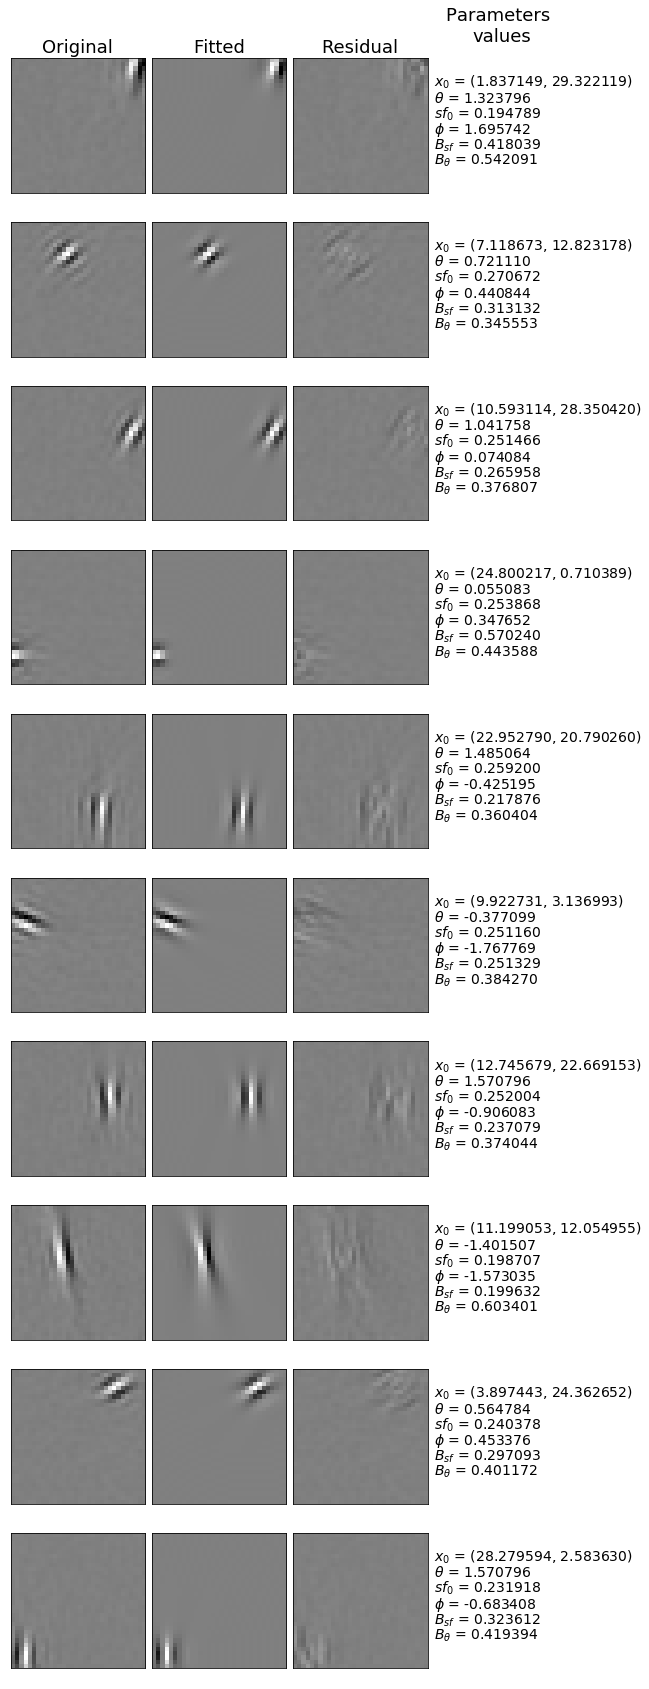

In [20]:
subplotpars = matplotlib.figure.SubplotParams(wspace=0.05, hspace=0.05)

nrows = 10 # numbers of dictionaries to show
ncols = 4 # number of columns: input, fit, residual, stats

fig, ax = plt.subplots(nrows, ncols, figsize=(10, 30), subplotpars=subplotpars) 

idx = rand.permutation(dictx.shape[0])
idx = idx[:nrows]

for k in range(nrows):
        
    patch_original = np.reshape(dictx[idx[k],:],(32,32))
    cmax = np.max(np.abs(patch_original))
    patch_fitted = np.reshape(dictx_fit[idx[k],:],(32,32))
    residual = patch_original - patch_fitted
    
    opts = dict(cmap='gray', vmin=-cmax, vmax=+cmax)
    opts2= dict(fontsize=14)
    
    i=0
    ax[k,i].imshow(patch_original, **opts)
    ax[k,i].xaxis.set_visible(False)
    ax[k,i].yaxis.set_visible(False)
    if k==0:
        ax[k,i].set_title('Original', fontsize=18)
    
    i=1
    ax[k,i].imshow(patch_fitted, **opts)
    ax[k,i].xaxis.set_visible(False)
    ax[k,i].yaxis.set_visible(False)
    if k==0:
        ax[k,i].set_title('Fitted', fontsize=18)
    
    i=2
    ax[k,i].imshow(residual, **opts)
    ax[k,i].xaxis.set_visible(False)
    ax[k,i].yaxis.set_visible(False)
    if k==0:
        ax[k,i].set_title('Residual', fontsize=18)
        
    i=3
    ax[k,i].text(0, 0.75, r'$x_0$ = (%3f, %3f)'%(dictx_fit_param[idx[k],0],dictx_fit_param[idx[k],1]), **opts2)
    ax[k,i].text(0, 0.65, r'$\theta$ = %3f'%(dictx_fit_param[idx[k],2]), **opts2)
    ax[k,i].text(0, 0.55, r'$sf_0$ = %3f'%(dictx_fit_param[idx[k],3]), **opts2)
    ax[k,i].text(0, 0.45, r'$\phi$ = %3f'%(dictx_fit_param[idx[k],4]), **opts2)
    ax[k,i].text(0, 0.35, r'$B_{sf}$ = %3f'%(dictx_fit_param[idx[k],5]), **opts2)
    ax[k,i].text(0, 0.25, r'$B_\theta$ = %3f'%(dictx_fit_param[idx[k],6]), **opts2)
    ax[k,i].xaxis.set_visible(False)
    ax[k,i].yaxis.set_visible(False)
    ax[k,i].spines["top"].set_visible(False)
    ax[k,i].spines["left"].set_visible(False)
    ax[k,i].spines["right"].set_visible(False)
    ax[k,i].spines["bottom"].set_visible(False)
    if k==0:
        ax[k,i].set_title('Parameters \nvalues', fontsize=18)
        